Portfolio Suitability

In [4]:
#Imports

import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from fpdf import FPDF
#from MCForecastTools import MCSimulation
from pathlib import Path
%matplotlib inline
# from mailer import Mailer
import questionary
import fire
from questionary.constants import NO, YES, YES_OR_NO
import sqlalchemy
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np

import numpy.logical_and

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')






ModuleNotFoundError: No module named 'numpy.logical_and'

In [5]:
# create table

database_connection_string = "sqlite:///"
engine = sqlalchemy.create_engine(database_connection_string, echo=True)

engine.table_names()

create_table = (

"""
CREATE TABLE client(
    "full_name" VARCHAR,
    "phone_number" VARCHAR,
    "email_address" VARCHAR,
    "annual_income" FLOAT,
    "investing_experience" FLOAT,
    "investment_amount" FLOAT,
    "annual_expenses" FLOAT,
    "income_stability" VARCHAR,
    "risk_level" VARCHAR,
    "investment_strategy" VARCHAR,
    "investment_length" VARCHAR
)
"""
)
engine.execute(create_table)


C:\Users\kjg20\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:6: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  


2022-02-14 18:35:02,016 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-02-14 18:35:02,017 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-02-14 18:35:02,018 INFO sqlalchemy.engine.Engine 
CREATE TABLE client(
    "full_name" VARCHAR,
    "phone_number" VARCHAR,
    "email_address" VARCHAR,
    "annual_income" FLOAT,
    "investing_experience" FLOAT,
    "investment_amount" FLOAT,
    "annual_expenses" FLOAT,
    "income_stability" VARCHAR,
    "risk_level" VARCHAR,
    "investment_strategy" VARCHAR,
    "investment_length" VARCHAR
)

2022-02-14 18:35:02,019 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-02-14 18:35:02,020 INFO sqlalchemy.engine.Engine COMMIT


In [6]:
# Load dummy data for testing only.  DELETE BEFORE USING

full_name = "Jacob"
phone_number = "713-555-7834"
email_address = "cdb@bcg.law"
annual_income = 100000
investing_experience = 4
investment_amount = 10000
annual_expenses = 50000
income_stability = "YES"
risk_level = "Low"
investment_strategy = "Value"
investment_length = "0-1"

insert_data = """
    INSERT INTO client (
        'full_name', 'phone_number', 'email_address', 'annual_income', 'investing_experience', 'investment_amount', 'annual_expenses', 'income_stability', 'risk_level', 
        'investment_strategy', 'investment_length')
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """
    
engine.execute(insert_data, (full_name, phone_number, email_address, annual_income, investing_experience, investment_amount, annual_expenses, income_stability, risk_level, investment_strategy, investment_length))
    

2022-02-14 18:35:02,351 INFO sqlalchemy.engine.Engine 
    INSERT INTO client (
        'full_name', 'phone_number', 'email_address', 'annual_income', 'investing_experience', 'investment_amount', 'annual_expenses', 'income_stability', 'risk_level', 
        'investment_strategy', 'investment_length')
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    
2022-02-14 18:35:02,352 INFO sqlalchemy.engine.Engine [raw sql] ('Jacob', '713-555-7834', 'cdb@bcg.law', 100000, 4, 10000, 50000, 'YES', 'Low', 'Value', '0-1')
2022-02-14 18:35:02,353 INFO sqlalchemy.engine.Engine COMMIT


In [7]:
engine.table_names()

read_all_data = """
SELECT * FROM client
"""
results = engine.execute(read_all_data)
for row in results:
    print(row)


C:\Users\kjg20\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


2022-02-14 18:35:02,642 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-02-14 18:35:02,643 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-02-14 18:35:02,644 INFO sqlalchemy.engine.Engine 
SELECT * FROM client

2022-02-14 18:35:02,645 INFO sqlalchemy.engine.Engine [raw sql] ()
('Jacob', '713-555-7834', 'cdb@bcg.law', 100000.0, 4.0, 10000.0, 50000.0, 'YES', 'Low', 'Value', '0-1')


In [8]:
print(full_name)
print(annual_income-annual_expenses)

Jacob
50000


In [9]:
# Load env
load_dotenv()
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
display(type(alpaca_api_key))
display(type(alpaca_secret_key))
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

str

str

In [10]:
# Use questions to determine the clients risk tolerance, investment horizen, income v. growth   

In [11]:
# Convert Investor Responses to Risk Scores

risk_score = 0
time_score = 0

investment_percent = investment_amount / annual_income
disposible_income = annual_income - annual_expenses
investment_ratio = disposible_income / investment_amount

if investment_percent < .40:
    risk_score += 100
elif investment_percent > .40 and investment_percent < .80:
    risk_score += 50
else:
    risk_score += 0

if investing_experience < 4:
    risk_score -= 10
elif investing_experience > 4 and investing_experience < 9:
    risk_score += 0
else:
    risk_score += 10

if income_stability:
    risk_score += 0
else:
    risk_score -= 40

if risk_level == "Low":
    risk_score * .1
elif risk_level == "Moderate":
    risk_score * .5
elif risk_level == "High":
    risk_score * 1
else:
    risk_score * 1.10

if investment_length == "0-1":
    time_score += 25
elif investment_length == "2-4" and investment_length <= 4:
    time_score += 50
elif investment_length == "5-9" and investment_length <= 9:
    time_score += 75
else:
    time_score += 100

In [12]:
print(risk_score)
print(time_score)
print(investment_strategy)

110
25
Value


In [13]:
# Import stock symbol db
nasdaq = pd.read_csv(
    Path("Resources/nasdaq.csv"),
    index_col = "Symbol",
)

display(nasdaq.head())
display(nasdaq.tail())



FileNotFoundError: [Errno 2] No such file or directory: 'Resources\\nasdaq.csv'

In [14]:
# Clean NASDAQ Data by Removing Columns

nasdaq = nasdaq.drop(['Last Sale', 'Net Change', '% Change', 'IPO Year', 'Country'], axis=1)

nasdaq.head()

NameError: name 'nasdaq' is not defined

In [15]:
# Load stocks based on client suitability

#  If variables to select the etfs
client_etf = "IEF"

client_weight = 100


In [16]:
# Determine info for SPY, QQQ, IEF, and client selections

# Use Alpaca to pull last 3 years data for SPY, QQQ, IEF, and Client Selections

# Set the ticker symbols
tickers = ["QQQ","SPY", "IEF", "DIA"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years.
start_date = pd.Timestamp("2019-02-09", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-02-09", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

# Get 3 year's worth of historical data for tickers
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date,
  limit=limit_rows
).df

# Display sample data
prices_df.head()
prices_df.tail()

#  Create an empty `closing_prices_df` DataFrame using Pandas
closing_prices_df = pd.DataFrame()

# Populate the `closing_prices_df` DataFrame by accessing the `close` column from the `prices_df` DataFrame for both KO and TSLA .
closing_prices_df["QQQ"] = prices_df["QQQ"]["close"]
closing_prices_df["SPY"] = prices_df["SPY"]["close"]
closing_prices_df["IEF"] = prices_df["IEF"]["close"]
closing_prices_df["DIA"] = prices_df["DIA"]["close"]


closing_prices_df

daily_returns_df = closing_prices_df.pct_change().dropna()

display(daily_returns_df.head())
display(daily_returns_df.tail())
display(daily_returns_df.describe())
display(daily_returns_df.count())



,QQQ,SPY,IEF,DIA
time,,,,
2019-02-12 00:00:00-05:00,0.014995,0.012692,-0.001436,0.014552
2019-02-13 00:00:00-05:00,0.000205,0.003302,-0.002253,0.004991
2019-02-14 00:00:00-05:00,0.001930,-0.001618,0.004277,-0.002503
2019-02-15 00:00:00-05:00,0.003561,0.009962,-0.000586,0.013446
2019-02-19 00:00:00-05:00,0.001745,0.001839,0.001830,0.000812


,QQQ,SPY,IEF,DIA
time,,,,
2022-02-03 00:00:00-05:00,-0.040511,-0.023311,-0.004087,-0.014101
2022-02-04 00:00:00-05:00,0.012387,0.004679,-0.007762,-0.000342
2022-02-07 00:00:00-05:00,-0.007905,-0.003343,0.000270,-0.000057
2022-02-08 00:00:00-05:00,0.011375,0.008184,-0.003506,0.010460
2022-02-09 00:00:00-05:00,0.021130,0.014682,0.001534,0.008801


,QQQ,SPY,IEF,DIA
count,756.000000,756.000000,756.000000,756.000000
mean,0.001159,0.000795,0.000088,0.000578
std,0.015990,0.014113,0.003767,0.014698
min,-0.125748,-0.115916,-0.024658,-0.127758
25%,-0.004949,-0.003792,-0.001980,-0.004204
50%,0.001886,0.001362,0.000089,0.000957
75%,0.008765,0.006977,0.002160,0.006126
max,0.094274,0.094737,0.026096,0.113466


QQQ    756
SPY    756
IEF    756
DIA    756
dtype: int64

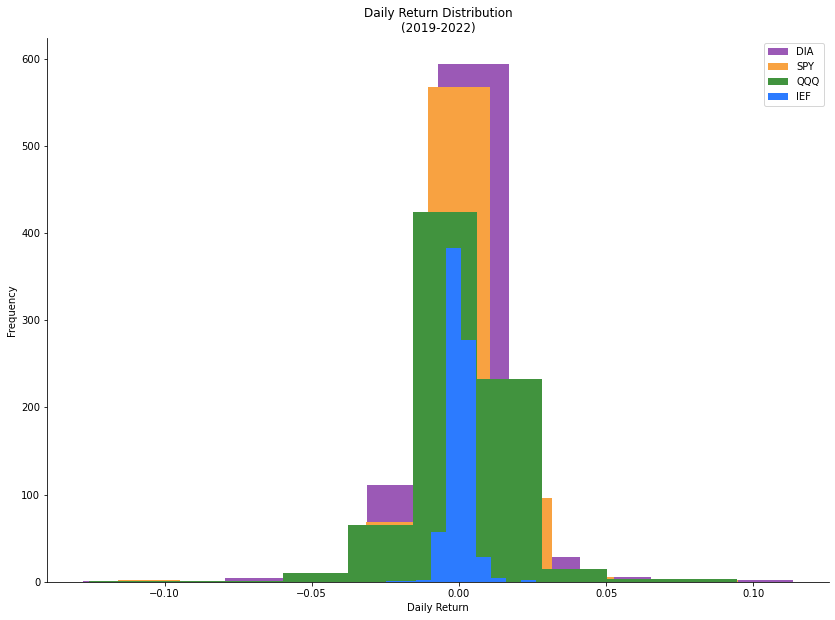

In [17]:


# Visualize distribution of percent change in closing price using a histogram plot

#daily_returns_df["QQQ"].plot.hist(title='QQQ Probability Distribution')
#daily_returns_df["SPY"].plot.hist(title='SPY Probability Distribution')
#daily_returns_df["IEF"].plot.hist(title='IEF Probability Distribution')
#daily_returns_df["DIA"].plot.hist(title='DIA Probability Distribution')

first = daily_returns_df['QQQ']
second = daily_returns_df["SPY"]
third = daily_returns_df["IEF"]
fourth = daily_returns_df["DIA"]

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set(title = "Daily Return Distribution\n(2019-2022)",
       xlabel = "Daily Return",
       ylabel = "Frequency")

plt.hist(fourth, bins=10, color='#9B59B6', label="DIA")
plt.hist(second, bins=10, color='#F8A241', label="SPY")
plt.hist(first, bins=10, color='#41933E', label="QQQ")
plt.hist(third, bins=10, color='#2C7BFF', label="IEF")
plt.legend()
plt.show()
    # 

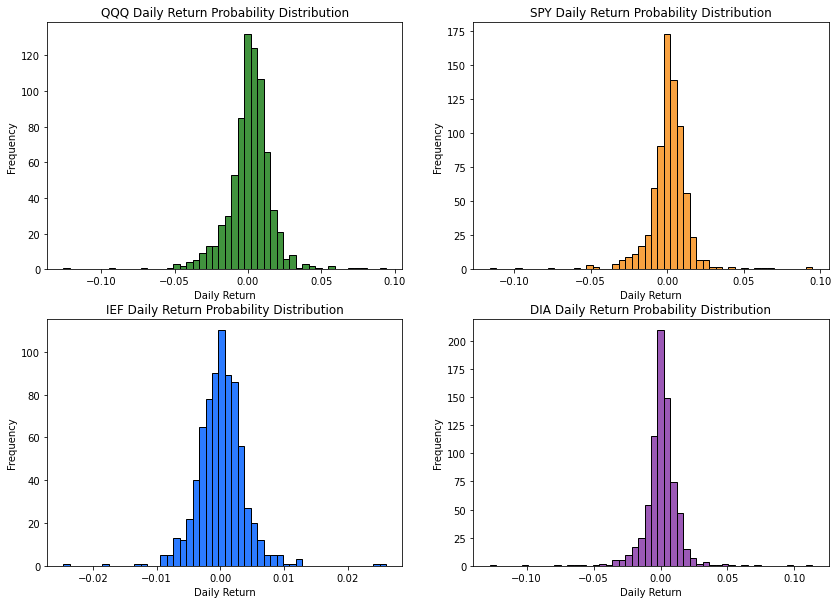

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(14,10))

axs[0, 0].hist(first, bins=50, color='#41933E', edgecolor="black")
axs[0, 0].set_title('QQQ Daily Return Probability Distribution')

axs[0, 1].hist(second, bins=50, color='#F8A241', edgecolor="black")
axs[0, 1].set_title('SPY Daily Return Probability Distribution')

axs[1, 0].hist(third, bins=50, color='#2C7BFF', edgecolor="black")
axs[1, 0].set_title('IEF Daily Return Probability Distribution')

axs[1, 1].hist(fourth, bins=50, color='#9B59B6', edgecolor="black")
axs[1, 1].set_title('DIA Daily Return Probability Distribution')

for ax in axs.flat:
    ax.set(xlabel='Daily Return', ylabel='Frequency')   
# Find a way to display IEF to show how small it truly is.
    # how many bins????

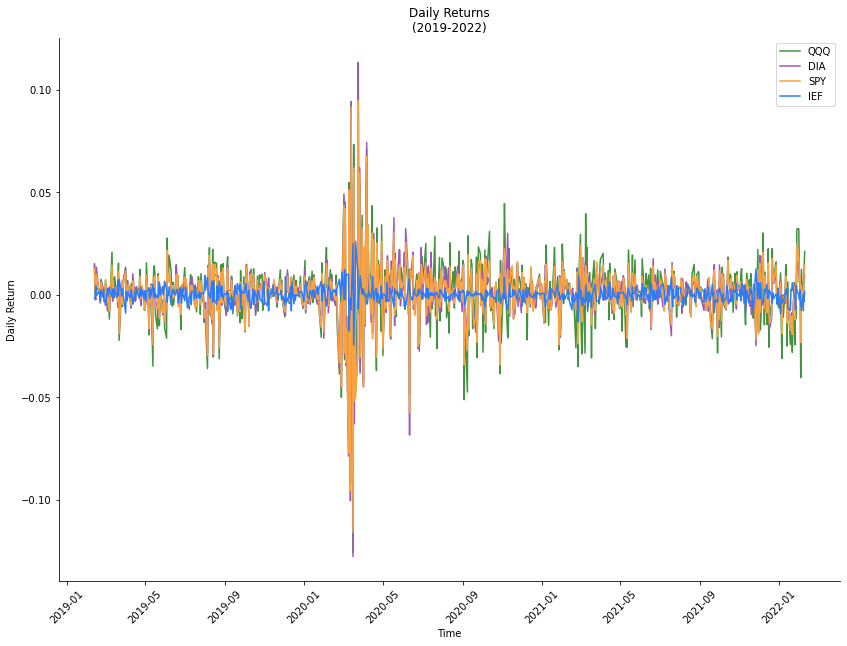

In [19]:
first = daily_returns_df['QQQ']
fourth = daily_returns_df["DIA"]
second = daily_returns_df["SPY"]
third = daily_returns_df["IEF"]

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set(title = "Daily Returns\n(2019-2022)",
       xlabel = "Time",
       ylabel = "Daily Return")

plt.plot(first, label = "QQQ", color='#41933E')
plt.plot(fourth, label = "DIA", color='#9B59B6')
plt.plot(second, label = "SPY", color='#F8A241')
plt.plot(third, label = "IEF", color='#2C7BFF')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.legend()
plt.show()
    # The daily return measures the dollar change in a stock's price as a percentage of the previous day's closing price.
    
    # This visualization compares each ETF's daily return data on a line graph. Using this graph we can see the arrangement of daily return differences for QQQ, DIA, SPY, and IEF. 
    # Daily returns are used to measure daily stock movement, it compares the price of todays closure to the price of yesterdays closure. 
    # From this visualization we can see that IEF has a much steadier daily return compared to the other ETFs.
    # This means that on average if you were invested into IEF you would experience a smaller gain/loss on a daily basis when compared to the other ETFs.
    # A much more speculative option would be investing in QQQ or DIA since there is an opportunity for larger profits.
        # don't really know how to phrase that this graph is more useful for short-term trading
        # also, SPY and DIA share similar daily returns.
        # From stable to least stable: IEF, SPY, DIA, and QQQ
        
# IEF AS BLUE


In [20]:
cumulative_returns = (1+daily_returns_df).cumprod()-1
#cumulative_returns.head()

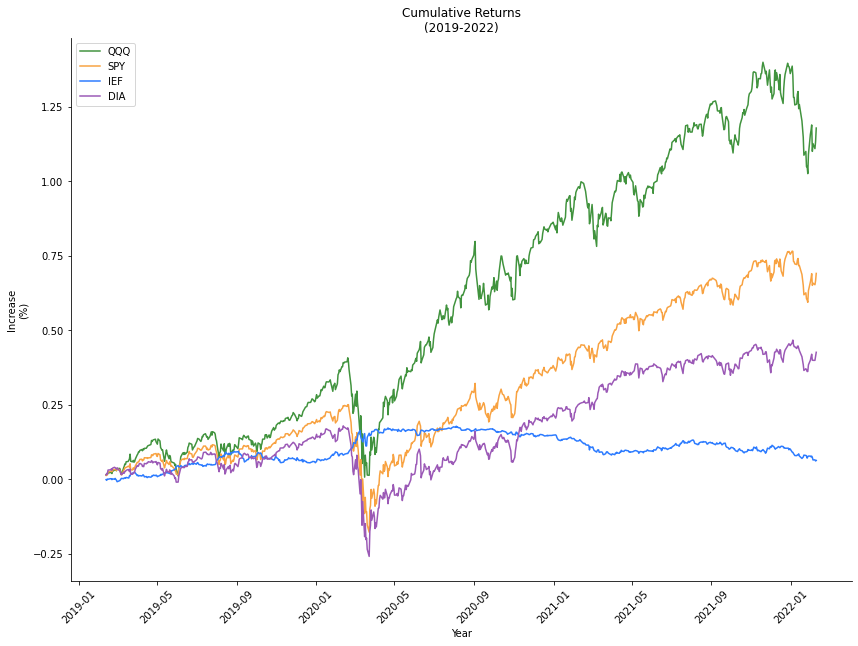

In [21]:
#cumulative_returns.plot.line(figsize= (14,10))
first = cumulative_returns['QQQ'].loc["2019-02-12":"2022-02-12"]
second = cumulative_returns["SPY"].loc["2019-02-12":"2022-02-12"]
third = cumulative_returns["IEF"].loc["2019-02-12":"2022-02-12"]
fourth = cumulative_returns["DIA"].loc["2019-02-12":"2022-02-12"]
    # Unsure of dates

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set(title = "Cumulative Returns\n(2019-2022)",
       xlabel = "Year",
       ylabel = "Increase\n(%)")

plt.plot(first, label = "QQQ", color='#41933E')
plt.plot(second, label = "SPY", color='#F8A241')
plt.plot(third, label = "IEF", color='#2C7BFF')
plt.plot(fourth, label = "DIA", color='#9B59B6')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.legend()
plt.show()
    # Cumulative returns measures the total change in the investment's value over a specific time period. This visualization allows us to compare the differences in cumulative returns between the four ETFs.
    # Basically, this graph displays the cumulative daily return growth of each ETF if you were to invest on a specific day. 
    # The numbers on the y-axis represent the value's percentage change of the initial investment.
    # This graph shows us that QQQ has a much higher cumulative return compared to the other ETFs.
    # When compared to the previous graph measuring daily returns, we can see that QQQ, the ETF with the least stable daily returns resulted in the largest cumulative growth.
    # We can also see that IEF, the ETF with the most stable daily returns in the previous graph, has the lowest cumulative overall.
    

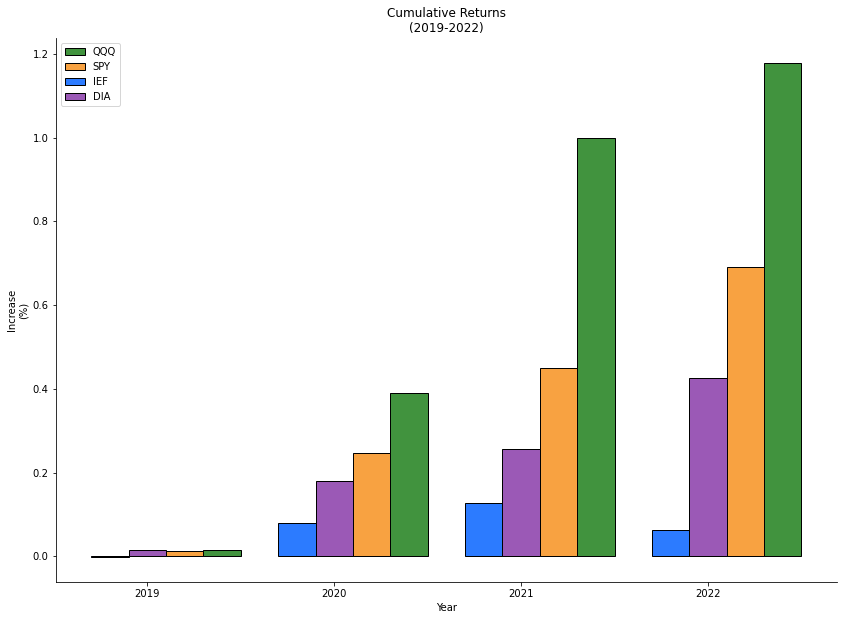

In [22]:
# Created Grouped Bar Chart

# Assign data to variables
x = np.arange(4)
y1 = [cumulative_returns["QQQ"].loc["2019-02-12"],cumulative_returns["QQQ"].loc["2020-02-12"],cumulative_returns["QQQ"].loc["2021-02-12"],cumulative_returns["QQQ"].loc["2022-02-9"]]
y2 = [cumulative_returns["SPY"].loc["2019-02-12"],cumulative_returns["SPY"].loc["2020-02-12"],cumulative_returns["SPY"].loc["2021-02-12"],cumulative_returns["SPY"].loc["2022-02-9"]]
y3 = [cumulative_returns["IEF"].loc["2019-02-12"],cumulative_returns["IEF"].loc["2020-02-12"],cumulative_returns["IEF"].loc["2021-02-12"],cumulative_returns["IEF"].loc["2022-02-9"]]
y4 = [cumulative_returns["DIA"].loc["2019-02-12"],cumulative_returns["DIA"].loc["2020-02-12"],cumulative_returns["DIA"].loc["2021-02-12"],cumulative_returns["DIA"].loc["2022-02-9"]]
    # Unsure of dates

width = 0.2
# Making the top and right spine invisible / setting size parameters:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set(title = "Cumulative Returns\n(2019-2022)",
       xlabel = "Year",
       ylabel = "Increase\n(%)")

# Choosing customization options:
plt.bar(x+0.4, y1, width, color='#41933E', edgecolor="black")
plt.bar(x+0.2, y2, width, color='#F8A241', edgecolor="black")
plt.bar(x-0.2, y3, width, color='#2C7BFF', edgecolor="black")
plt.bar(x, y4, width, color='#9B59B6', edgecolor="black")
plt.xticks(x, ["2019", "2020", "2021", "2022"])
plt.legend(["QQQ","SPY","IEF", "DIA"])
plt.show()
    # .8 = 80% increase, 1.2= 120% increase
    # Could have 16 periods rather than 4.
    
    # This is a grouped bar chart that uses the same data as the previous cumulative returns line graph. This is just another way of visualizing and understanding the data more thoroughly.
    # Each bar group represents a year of cumulative growth that started in 2019. Each bar represents a different ETF and the y-axis represents the percentage change in the total value of the investment.
    # This visualization allows us to see how each ETF price has changed on a year to year basis.
    # We can see that IEF experienced very slow growth until 2021-2022 where the ETF actually lost value.
    # We can also see that DIA and SPY has a similar level of growth and they both experienced the most increase from 2021-2022.
    # Finally, we can see that QQQ has experienced the most growth overall with its largest increase from 2020-2021.

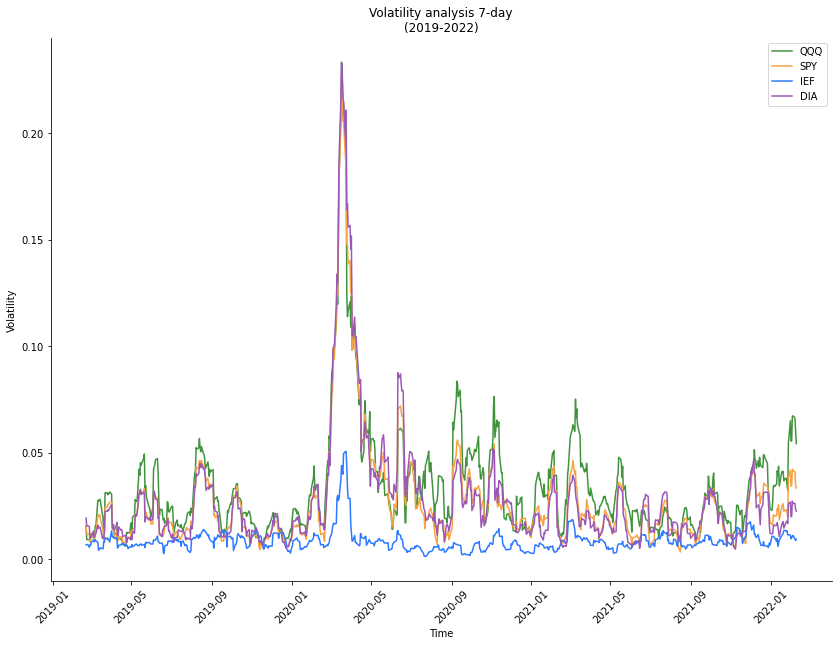

In [23]:
# Volatility line chart (7-day rolling daily return avg.)
daily_7_rolling_returns = daily_returns_df.rolling(7).std()*np.sqrt(7)

first_7 = daily_7_rolling_returns['QQQ']
second_7 = daily_7_rolling_returns["SPY"]
third_7 = daily_7_rolling_returns["IEF"]
fourth_7 = daily_7_rolling_returns["DIA"]

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set(title = "Volatility analysis 7-day\n(2019-2022)",
       xlabel = "Time",
       ylabel = "Volatility")

plt.plot(first_7, label = "QQQ", color='#41933E')
plt.plot(second_7, label = "SPY", color='#F8A241')
plt.plot(third_7, label = "IEF", color='#2C7BFF')
plt.plot(fourth_7, label = "DIA", color='#9B59B6')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.legend()
plt.show()
    
    # This is a 7-day rolling volatility graph. This visualization uses a seven day rolling window calculation that took the last seven days, adds them together, and then divides them by seven. 
    # This graph displays the differences between the ETF's seven day rolling volatilities.
    # First, we see that IEF has a substantially lower volatility compared to the other ETFs.
    # The next notable observation is that all the ETFs follow a similar pattern with differing levels of volatility, specifically around 2020-02 to 2020-05.
    # We can also see that QQQ has the highest overall volatility since it experiences the highest volatility spikes compared to the rest of the ETFs.
    

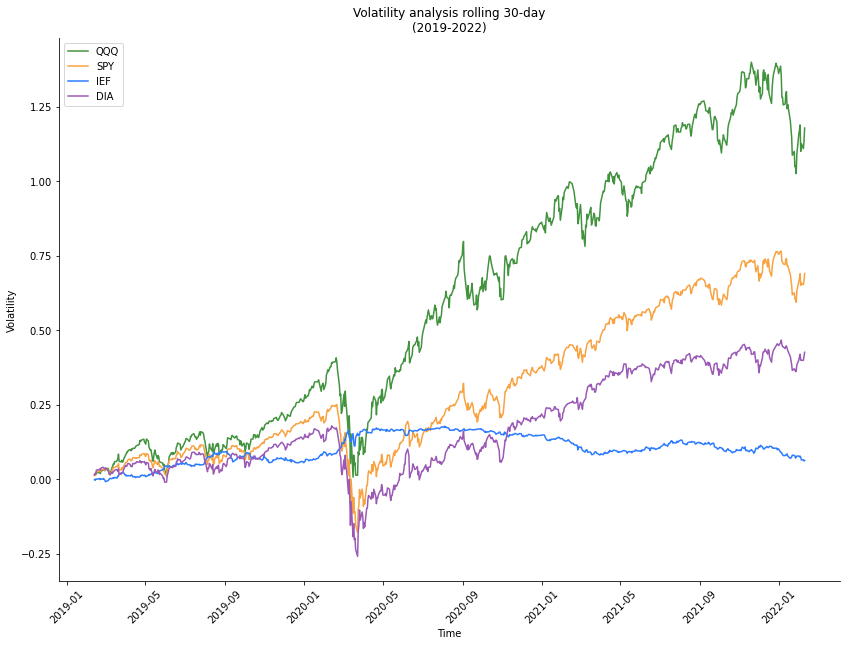

In [24]:
# 30-day rolling volatility analysis
daily_30_rolling_returns = daily_returns_df.rolling(30).std()*np.sqrt(30)

first_30 = daily_30_rolling_returns['QQQ']
second_30 = daily_30_rolling_returns["SPY"]
third_30 = daily_30_rolling_returns["IEF"]
fourth_30 = daily_30_rolling_returns["DIA"]

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set(title = "Volatility analysis rolling 30-day\n(2019-2022)",
       xlabel = "Time",
       ylabel = "Volatility")

plt.plot(first, label = "QQQ", color='#41933E')
plt.plot(second, label = "SPY", color='#F8A241')
plt.plot(third, label = "IEF", color='#2C7BFF')
plt.plot(fourth, label = "DIA", color='#9B59B6')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.legend()
plt.show()

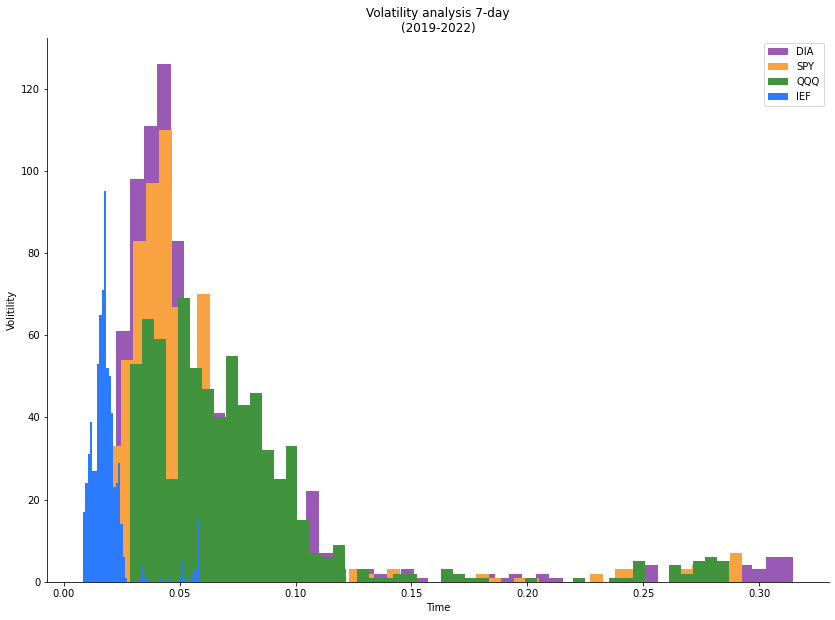

In [26]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set(title = "Volatility analysis 7-day\n(2019-2022)",
       xlabel = "Time",
       ylabel = "Volitility")
plt.hist(fourth_30, bins=50, color='#9B59B6', label="DIA")
plt.hist(second_30, bins=50, color='#F8A241', label="SPY")
plt.hist(first_30, bins=50, color='#41933E', label="QQQ")
plt.hist(third_30, bins=50, color='#2C7BFF', label="IEF")
plt.legend()
plt.show()

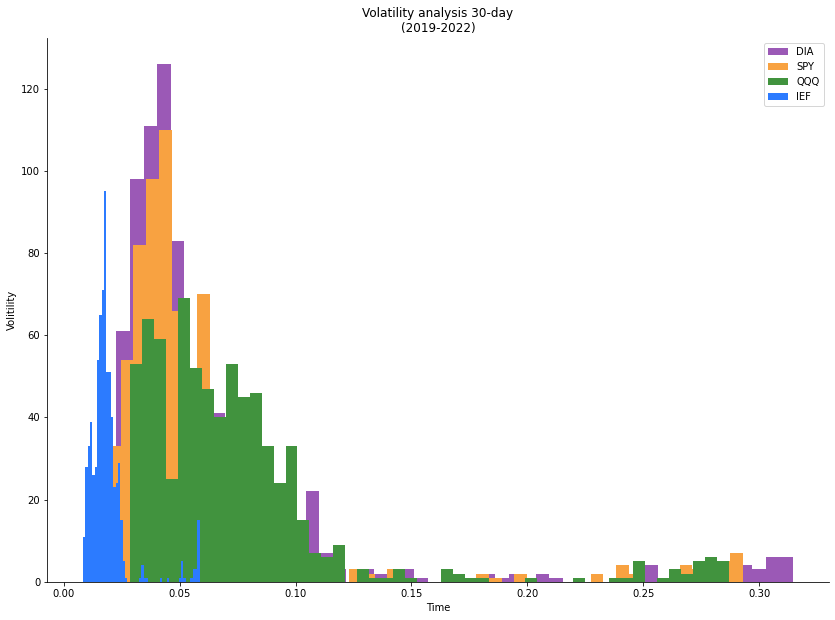

In [24]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(14)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set(title = "Volatility analysis 30-day\n(2019-2022)",
       xlabel = "Time",
       ylabel = "Volitility")
plt.hist(fourth_30, bins=50, color='#9B59B6', label="DIA")
plt.hist(second_30, bins=50, color='#F8A241', label="SPY")
plt.hist(first_30, bins=50, color='#41933E', label="QQQ")
plt.hist(third_30, bins=50, color='#2C7BFF', label="IEF")
plt.legend()
plt.show()

In [25]:
# Trend analysis pie chart

def trend(x):
    if x > -0.5 and x <= 0.5:
        return "Slight or No change"
    elif x > 0.5 and x <= 1:
        return "Slight Positive"
    elif x > -1 and x <= -0.5:
        return "Slight Negative"
    elif x > 1 and x <= 3:
        return "Positive"
    elif x > -3 and x <= -1:
        return "Negative"
    elif x > 3 and x <= 7:
        return "Among top gainers"
    elif x > -7 and x <= -3:
        return "Among top losers"
    elif x > 7:
        return "Bull run"
    elif x <= -7:
        return "Bear drop"


qqq_daily["Trend"]= np.zeros(qqq_daily.count())
a= qqq_daily["Trend"]= np.zeros(qqq_daily.count())
qqq_daily["Trend"]= a.any(qqq_daily.apply(lambda x:trend(x)))

NameError: name 'qqq_daily' is not defined

In [ ]:
# Return/Risk Distribution Donut Graph
# donut chart on plot graph

# plot graph: x = Std. Dev. of risk, y = annualized return
# donut graph made up of: Cash & Cash Alternatives, Fixed Income, and Equity
first = (daily_returns_df['QQQ'].rolling(7).std()*np.sqrt(7)).mean()
display(first)

In [ ]:
# Candle Stick work in progress

#create figure
plt.figure()

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = prices[prices.close>=prices.open]
down = prices[prices.close<prices.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index,down.high-down.open,width2,bottom=down.open,color=col2)
plt.bar(down.index,down.low-down.close,width2,bottom=down.close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()

In [ ]:
cumulative_returns.head()
display()

In [ ]:
# Run MC Sim for SPY, DIA, IEF, and client selection
display(avg_closing_price_2019)
display(closing_prices_df["QQQ"].loc["2019-02-12"])

In [ ]:
# Present comparisons in table

cumulative_returns.describe()

In [ ]:
# Run MC
MC_fiveyear = MCSimulation(
  portfolio_data = prices_df,
  weights = [.30,.30,.40,0],
  num_simulation = 500,
  num_trading_days = 252*5
)

MC_cum = MC_fiveyear.calc_cumulative_return()

In [ ]:
#Plot simulation outcomes
MC_sim_line_plot = MC_fiveyear.plot_simulation()

MC_cum_mean = MC_cum.mean(axis=1)
MC_cum_mean.describe()


In [ ]:
# Present comparisons graphically
# Run MC
MC_fiveyear = MCSimulation(
  portfolio_data = prices_df,
  weights = [1,0,0,0],
  num_simulation = 500,
  num_trading_days = 252*5
)

MC_cum = MC_fiveyear.calc_cumulative_return()

MC_cum_mean = MC_cum.mean(axis=1)
MC_cum_mean.describe()


In [ ]:
MC_fiveyear = MCSimulation(
  portfolio_data = prices_df,
  weights = [0,0,1,0],
  num_simulation = 500,
  num_trading_days = 252*5
)

MC_cum = MC_fiveyear.calc_cumulative_return()

MC_cum_mean = MC_cum.mean(axis=1)
MC_cum_mean.describe()

In [ ]:
# Determine whether the client wants a PDF of the report

In [ ]:
# Provide written report and recommendations


WIDTH = 215.9
HEIGHT = 279.4

pdf = FPDF('P', 'mm', 'Letter')

# page 1
pdf.add_page()
pdf.set_font('Arial', '', 21)  
pdf.image("img/letterhead.png", 0, 0, WIDTH)
pdf.ln(10)
pdf.set_left_margin(100)
pdf.write(10, f"Portfolio Suitability Report")
pdf.set_left_margin(10)
pdf.ln(70)

pdf.set_font('Arial', '', 14)
pdf.write(4, f"Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec quam felis, ultricies nec, pellentesque eu, pretium quis, sem. Nulla consequat massa quis enim. Donec pede justo, fringilla vel, aliquet nec, vulputate eget, arcu. In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus. Phasellus viverra nulla ut metus varius laoreet. Quisque rutrum. Aenean imperdiet. Etiam ultricies nisi vel augue. Curabitur ullamcorper ultricies nisi. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante. Etiam sit amet orci eget eros faucibus tincidunt. Duis leo. Sed fringilla mauris sit amet nibh. Donec sodales sagittis magna. Sed consequat, leo eget bibendum sodales, augue velit cursus nunc,")
pdf.ln(10)
pdf.write(4, f"Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec quam felis, ultricies nec, pellentesque eu, pretium quis, sem. Nulla consequat massa quis enim. Donec pede justo, fringilla vel, aliquet nec, vulputate eget, arcu. In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus. Phasellus viverra nulla ut metus varius laoreet. Quisque rutrum. Aenean imperdiet. Etiam ultricies nisi vel augue. Curabitur ullamcorper ultricies nisi. Nam eget dui. Etiam rhoncus. Maecenas tempus, tellus eget condimentum rhoncus, sem quam semper libero, sit amet adipiscing sem neque sed ipsum. Nam quam nunc, blandit vel, luctus pulvinar, hendrerit id, lorem. Maecenas nec odio et ante tincidunt tempus. Donec vitae sapien ut libero venenatis faucibus. Nullam quis ante. Etiam sit amet orci eget eros faucibus tincidunt. Duis leo. Sed fringilla mauris sit amet nibh. Donec sodales sagittis magna. Sed consequat, leo eget bibendum sodales, augue velit cursus nunc,")

pdf.output('portfolio_suitability_report.pdf', 'F')


In [ ]:
# Mail the document
# mail = Mailer(email='portfoliosuitability@gmail.com', password='RiceBootCamp2022')
# mail.send(receiver='cdb@bcg.law', subject='You made it work!', message='Congrats')

In [ ]:

# # run the questions using fire.Fire
# def run():
   

#    survey_questions()
   
   

# if __name__ == "__main__":
#     fire.Fire(run)